# Halloween Candies Dataset - EDA & ML Basics

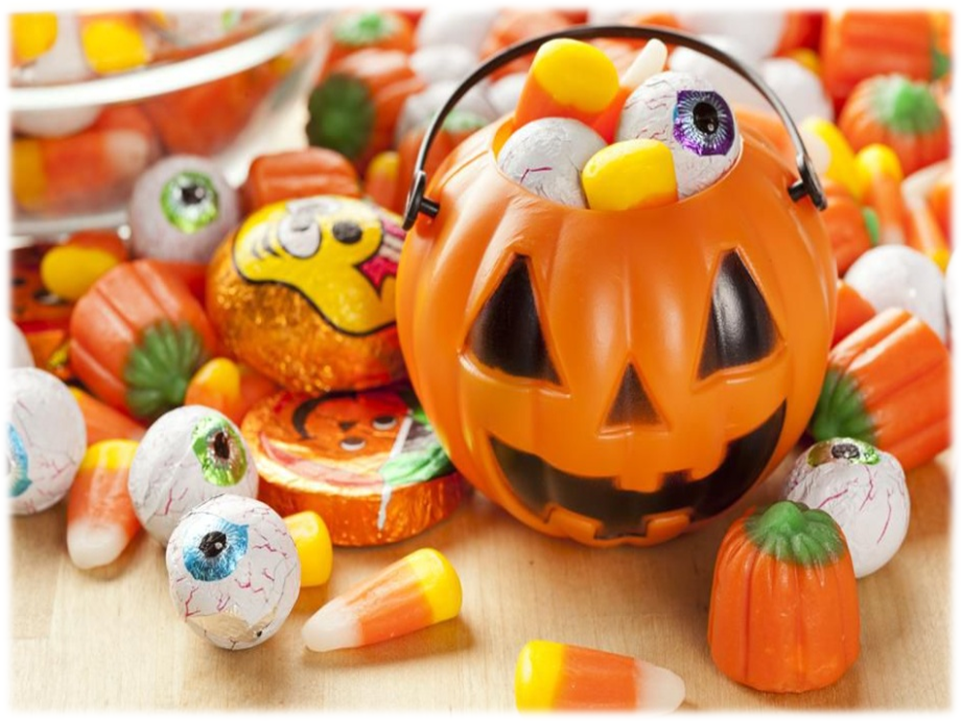

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Importing Halloween Candies Dataset and Description](#section3)<br>
4. [Exploratory Data Analysis](#section4)
    - 4.1 [Distribution of Numerical features](#section401)<br>
    - 4.2 [Which are the Top 10 Wining Candies?](#section402)<br>
    - 4.3 [Which are 10 Least Popular Candies?](#section403)<br>
    - 4.4 [Correlation between all features](#section404)<br>
    - 4.5 [Univariate Analysis of candies with win percent](#section405)<br>
    - 4.6 [Chocolate & Fruity candy Correlation](#section406)<br>
    - 4.7 [Sugar percent in candies](#section407)<br>
    - 4.8 [Top 10 Most Expensive Candies](#section408)<br>
    - 4.9 [Which are the most wining candy composition?](#section409)<br>
    - 4.10 [Correlation between sugarpercent, pricepercent on the wining percent](#section410)<br>
    - 4.11 [EDA Conclusion](#section411)<br>         
5. [Applying Regression Models: Linear, Decision Tree & Random Forest](#section5)<br>
    - 5.1 [Spliting Train/Test Data](#section501)<br>
    - 5.2 [Applying Min/Max Scaler](#section502)<br>
    - 5.3 [Applying Linear regression](#section503)<br>
        - 5.3.1 [Using the Model for Prediction](#section50301)<br>
        - 5.3.2 [Model evaluation of Linear Reg using MAE, MSE, RMSE and R2](#section50302)<br>
    - 5.4 [Applying Decision Tree Regression model](#section504)<br>
        - 5.4.1 [Using the Model for Prediction](#section50401)<br>
        - 5.4.2 [Model evaluation of Linear Reg using MAE, MSE, RMSE and R2](#section50402)<br>
    - 5.5 [Applying Random Forest Regression model](#section505)<br>
        - 5.5.1 [Using the Model for Prediction](#section50501)<br>
        - 5.5.2 [Model evaluation of Linear Reg using MAE, MSE, RMSE and R2](#section50502)<br>
        - 5.5.3 [Hyper-parameter tuning of model using GridSearchCV & RandomSearchCV](#section50503)<br>
6. [Performance of Regression models](#section6)<br>
7. [Feature Selection](#section7)<br>
    - 7.1 [Linear Regression with new features](#section701)<br>
    - 7.2 [Decision Tree Regression with new features](#section702)<br>
    - 7.3 [Random Forest Regression with new features](#section703)<br>
8. [Performance of Regression models with updated features](#section8)<br>
9. [Conclusion](#section9)<br>

## 1. Problem Statement

This dataset consists of various types of Halloween candies. Data was collected by creating a voting website named 'walthickey' where participants were shown presenting two fun-sized candies and asked to click on the one they would prefer to receive.

In our analysis through EDA and further through Predictive modelling we will find answers to our following questions,

1. Which is the most popular candy? and Which is the least popular?
2. Which quality/variety of candy are the most popular?
3. Sugarpercentage in various candy brands and it's contribtion to winpercent.
4. Pricepercentage of candies and it's contribtion to winpercent.
5. Which are the most frequest/wining candy composition?
6. Predictive modeling by applying various algorithms and evaluating model performances.


## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import itertools       #provides various functions that work on iterators to produce complex iterators

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

## 3. Importing Halloween Candies Dataset and Description

In [3]:
df_candies = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv')
df_candies.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


Description of the dataset

| Column Name     | Description                                              
| -------------   | :-------------                                            
| Chocolate       | Does it contain chocolate?
| fruity          | Is it fruit flavored?
| caramel         | Is there caramel in the candy?
| peanutalmondy   | Does it contain peanuts, peanut butter or almonds?
| nougat          | Does it contain nougat?
| crispedricewafer| Does it contain crisped rice, wafers, or a cookie component?
| hard            | Is it a hard candy?
| bar             | Is it a candy bar?
| pluribus        | Is it one of many candies in a bag or box?
| sugarpercent    | The percentile of sugar it falls under within the data set.
| pricepercent    | The unit price percentile compared to the rest of the set.
| winpercent      | The overall win percentage according to 269,000 matchups.



**1. Each row in the dataset corresponds to one type of Halloween candy.**

**2. Participants are shown different candies two at time and were asked which candy do they prefer.**

**3. After aggregating all the votes, each candy is given winpercent.**
You can visit the voting site to get an idea. 
walthickey.com/2017/10/18/whats-the-best-halloween-candy/**

**winpercent is the target variable.**

In [4]:
df_candies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [5]:
df_candies.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


Observations:
1. Dataset consists of total 85 observations.
2. Data types in dataset: Boolean = 9, Numeric = 3, Categorical = 1 
2. Dataset consists of no null values

## 4. Exploratory Data Analysis

### 4.1 Distribution of Numerical Features

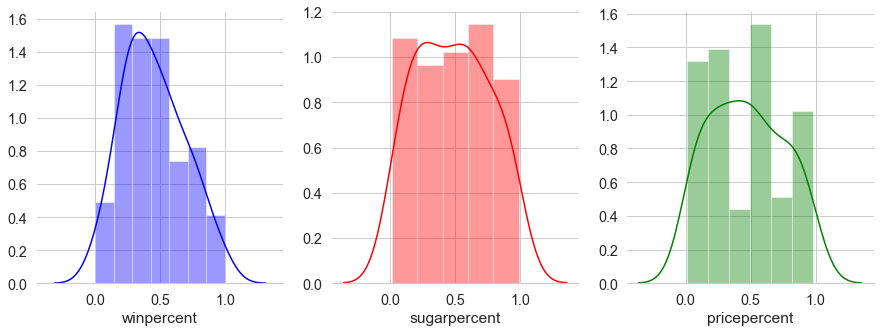

In [84]:
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True) 
sns.despine(left=True)

sns.distplot(df_candies.winpercent, color="blue", ax=axes[0])
sns.distplot(df_candies.sugarpercent, color="red", ax=axes[1])
sns.distplot(df_candies.pricepercent, color="green", ax=axes[2])
plt.savefig('distplot.png')

Observations:
1. Winpercent is normally distributed.
2. Sugarpercent is uniformly distributed across all candies. 
3. Similarly, prices of most of the candies are evenly spread. 


### 4.2 Which are the Top 10 Wining Candies?

In [7]:
df_candies.iloc[df_candies['winpercent'].sort_values(ascending=False)[:10].index, ::12]

,competitorname,winpercent
52,ReeseÕs Peanut Butter cup,84.180290
51,ReeseÕs Miniatures,81.866257
79,Twix,81.642914
28,Kit Kat,76.768600
64,Snickers,76.673782
53,ReeseÕs pieces,73.434990
36,Milky Way,73.099556
54,ReeseÕs stuffed with pieces,72.887901
32,Peanut butter M&MÕs,71.465050
42,Nestle Butterfinger,70.735641


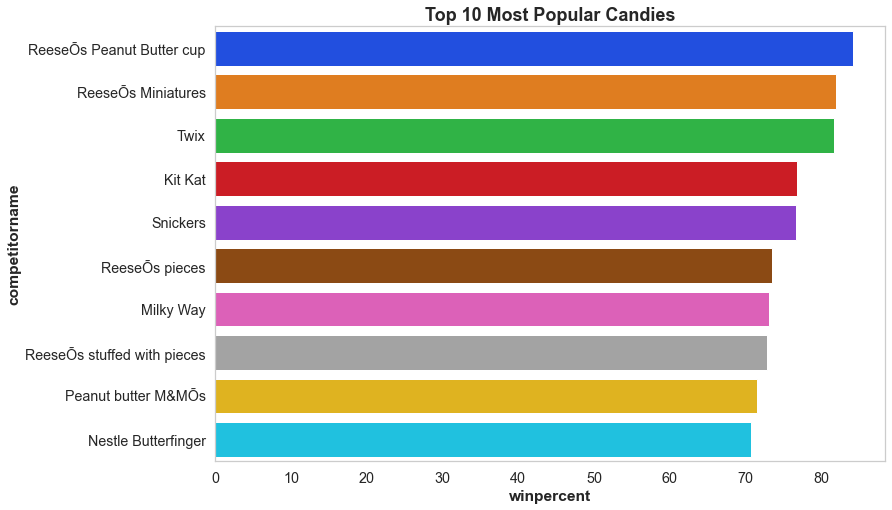

In [8]:
top_10_candies = df_candies.iloc[df_candies['winpercent'].sort_values(ascending=False)[:10].index, ::12]
plt.figure(figsize=(12,8))
sns.barplot(data=top_10_candies, x="winpercent", y="competitorname", palette='bright')

plt.xlabel('winpercent', fontweight="bold")
plt.ylabel('competitorname', fontweight="bold")
plt.title('Top 10 Most Popular Candies', fontweight="bold", fontsize=18)
plt.grid(False)
plt.savefig('Top_10_most_popular.png')

- **Reese's Peanut Butter cup** is most popular candy with 84% wining percent. Followed by **Reese's miniature** and **Twix** in the second place at **81%**

### 4.3 Which are 10 Least Popular Candies?

In [9]:
df_candies.iloc[df_candies['winpercent'].sort_values()[:10].index, ::12]

,competitorname,winpercent
44,Nik L Nip,22.445341
7,Boston Baked Beans,23.417824
12,Chiclets,24.524988
72,Super Bubble,27.303865
26,Jawbusters,28.127439
57,Root Beer Barrels,29.703691
71,Sugar Daddy,32.230995
2,One dime,32.261086
70,Sugar Babies,33.437550
19,Haribo Happy Cola,34.158958


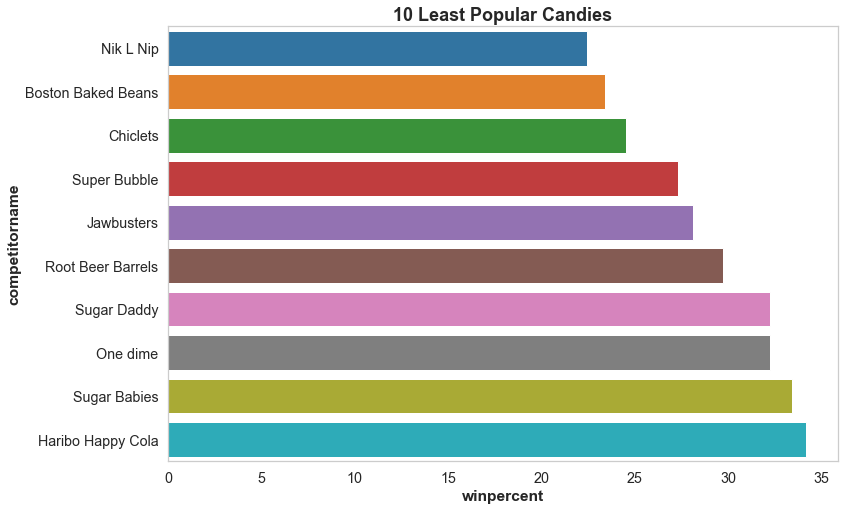

In [10]:
Least_10_candies = df_candies.iloc[df_candies['winpercent'].sort_values()[:10].index, ::12]
plt.figure(figsize=(12,8))
sns.barplot(data=Least_10_candies, x="winpercent", y="competitorname", palette='tab10')

plt.xlabel('winpercent', fontweight="bold")
plt.ylabel('competitorname', fontweight="bold")
plt.title('10 Least Popular Candies', fontweight="bold", fontsize=18)
plt.grid(False)
plt.savefig('Top_10_least_popular.png')

- Above bar chart shows that **'NikLNip'** is the least popular candy with wining percent of only 22%.

### 4.4 Correlation between all features

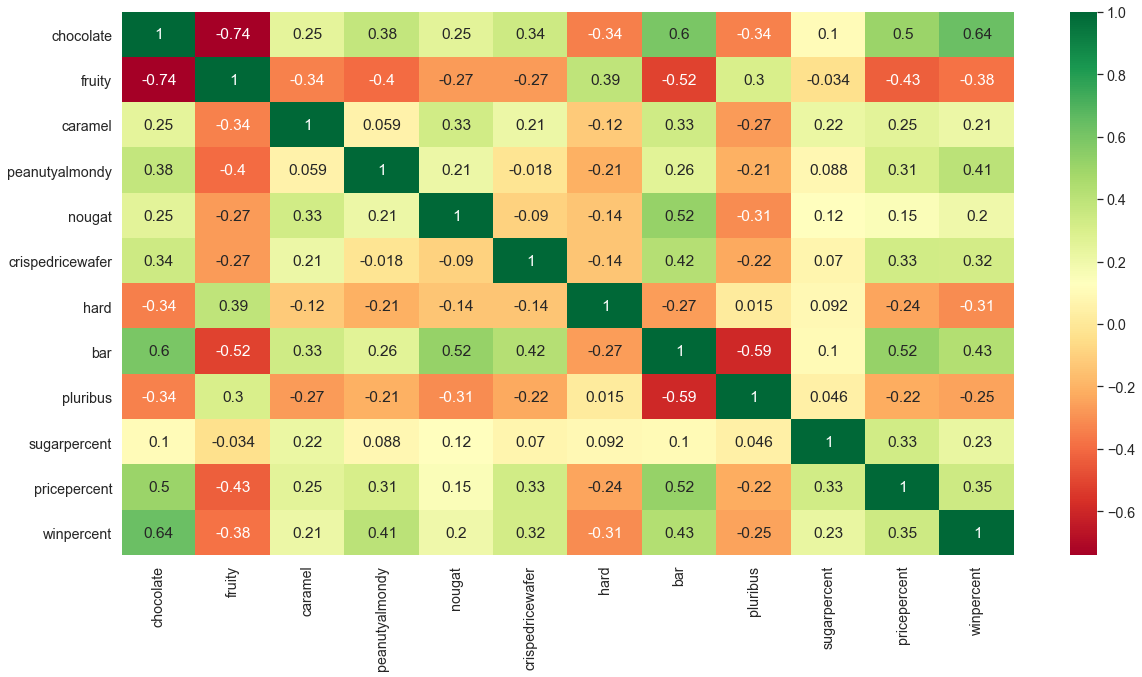

In [11]:
corr_mat = df_candies.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat, annot=True, cmap='RdYlGn')
#plt.savefig('candiescorrheatmap.png')

1. The above Heatmap shows clear and **high** co-relation between **Chocolate and the winpercent with 64%**.
2. **PeanutyAlmondy with 41%** and **crispedricewafer (32%)** are the next highly corelated with winpercent.
3. **Bar candies also are highly corelated with winpercent with 43%.**
4. It is noted that **Cholocate candies are high priced**.
5. Also, **cholocate in bar combination are positively correlated** than others.
6. **Chocolate and Bar candies are highly priced with positive correlation.**
6. It is observed that **Chocolate and Fruity** flavours have **strong negative correlation** of -0.74 as both these are 2 opposite components in a Candy which are a rarely mixed. We will analyse this further if we would need to keep or drop one of these components.
7. It is also noted that **Fruity**, **hard** and **pluribus** varieties of candy has **negative correlation with winpercent**. All these 3 varieties in any candy have an inverse proportion to the wining percentage. We will further analyse each of these components in detail.
8. **Sugarpercentage does not have a strong correlation with any component except for pricepercent.** It seems high priced candies are fairly high in sugar content. 
9. All the above parameters needs to be further analyzed individually with winpercent.

### 4.5 Univariate Analysis of candies with win percent

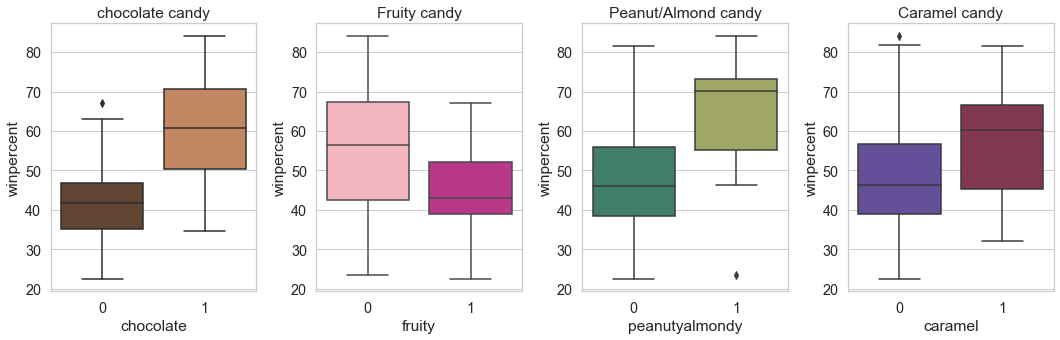

<Figure size 432x288 with 0 Axes>

In [12]:
#Plots to show individual features correlation with winpercent.

plt.figure(figsize=(15,5))
plt.subplot(1,4,1)
sns.boxplot(data=df_candies, x="chocolate", y="winpercent", palette='copper')
plt.title("chocolate candy")

plt.subplot(1,4,2)
sns.boxplot(data=df_candies, x="fruity", y="winpercent", palette="RdPu")
plt.title("Fruity candy")

plt.subplot(1,4,3)
sns.boxplot(data=df_candies, x="peanutyalmondy", y="winpercent", palette='gist_earth')
plt.title("Peanut/Almond candy")

plt.subplot(1,4,4)
sns.boxplot(data=df_candies, x="caramel", y="winpercent", palette='twilight')
plt.title("Caramel candy")


plt.tight_layout()
plt.show()
plt.savefig('subplots')

- Above box plots shows the variety of candies and its popularity amongst the population.
- Candy containing Chocolate - more than 80% of population liked candies that contain chocolate. Hence, it is an important feature to consider.
- Candy containing Fruity - more than 50% of population liked candies that contain fruity flavour. Hence, it is an important feature to consider.
- Candy containing Peanut/Almonds - more than 70% of population liked candies that contain peanut/almonds. Hence, it is an important feature to consider.
- Candy containing Caramel - more than 60% of population liked candies that contain peanut/almonds. Hence, it is an important feature to consider.

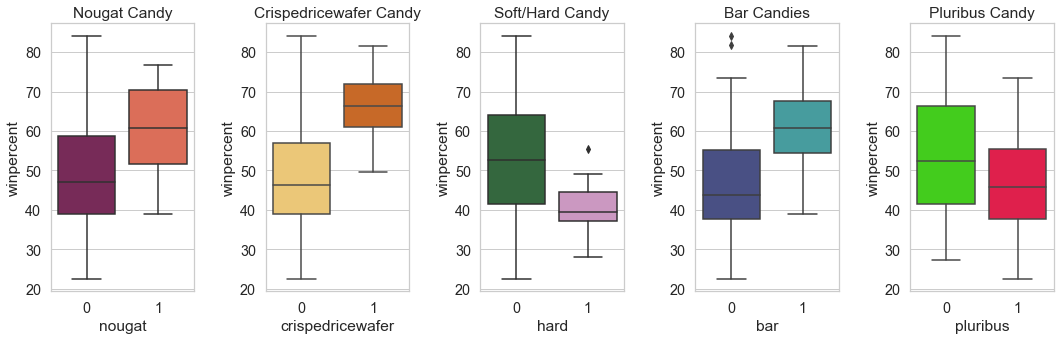

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,5,1)
sns.boxplot(data=df_candies, x="nougat", y="winpercent", palette='rocket')
plt.title("Nougat Candy")

plt.subplot(1,5,2)
sns.boxplot(data=df_candies, x="crispedricewafer", y="winpercent", palette="YlOrBr")
plt.title("Crispedricewafer Candy")

plt.subplot(1,5,3)
sns.boxplot(data=df_candies, x="hard", y="winpercent", palette='cubehelix')
plt.title("Soft/Hard Candy")

plt.subplot(1,5,4)
sns.boxplot(data=df_candies, x="bar", y="winpercent", palette='mako')
plt.title("Bar Candies")

plt.subplot(1,5,5)
sns.boxplot(data=df_candies, x="pluribus", y="winpercent", palette="prism")
plt.title("Pluribus Candy")


plt.tight_layout()
plt.show()
plt.savefig('subplot2')

- Above box plots shows the variety of candies and its popularity amongst the population.
- Candy containing nougat - more than 60% of population liked candies that contain chocolate. Hence, it is an important feature to consider.
- Candy containing crispedricewafer - more than 70% of population liked candies that contain fruity flavour. Hence, it is an important feature to consider.
- Hard Candy  - not more than 60% of population liked hard candies. Hence, it doesn't seen to have a significant effect on wnpercent.
- Bar Candy - more than 60% of population liked bar candies. Hence, it is an important feature to consider.
- Candy containing pluribus  - not more than 50% of population liked pluribus candies. Hence, it doesn't seen to have a significant effect on winpercent.

### 4.6 Chocolate & Fruity candy Correlation

In [14]:
df_candies[['chocolate', 'fruity', 'competitorname']].groupby(['chocolate', 'fruity'], as_index=False).count()

,chocolate,fruity,competitorname
0,0,0,11
1,0,1,37
2,1,0,36
3,1,1,1


- Above table shows that, there is only 1 candy with chocolate and fruity combination. 
- Hence, dropping either of the column may not be ideal as there are 37 & 36 of chocolate and fruity variety candies, which would be helpful in our analysis further.

### 4.7 Sugar percent in candies

In [15]:
df_candies.groupby(['competitorname'])['sugarpercent'].mean().sort_values(ascending=False)[:10]

competitorname
ReeseÕs stuffed with pieces    0.988
Sugar Babies                   0.965
Milky Way Simply Caramel       0.965
Skittles original              0.941
Skittles wildberry             0.941
Air Heads                      0.906
Candy Corn                     0.906
Gobstopper                     0.906
Mike & Ike                     0.872
Runts                          0.872
Name: sugarpercent, dtype: float64

Text(0.5, 0, 'Brands of Halloween Candies')

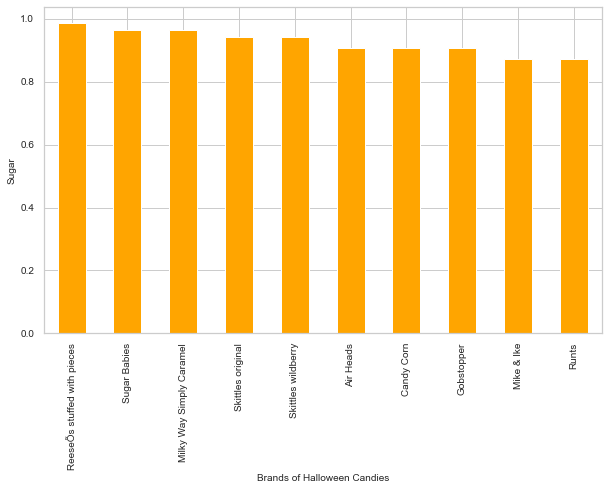

In [16]:
#Suger content in each brands

df_candies.groupby(['competitorname'])['sugarpercent'].mean().sort_values(ascending=False)[:10].plot(kind='bar', 
                        figsize=(10,6), fontsize=10, color='orange')
plt.ylabel('Sugar',fontsize=10 )
plt.xlabel('Brands of Halloween Candies', fontsize=10)

- the above bar chart shows which top 10 candies brand has highest quantity of sugar percentage. 
- It is observed that mostly all the above brands consist of sugar percent above 80%.
- However, the highest sugar content is in the **'Reese's'** brand of candies with **99% of sugar content**. Reese's candy is followed by **Sugar Babies and Milky way simply caramel** with **96.5%** of suagar content each. 

### 4.8 Top 10 Most Expensive Candies

In [17]:
df_candies.groupby(['competitorname'])['pricepercent'].mean().sort_values(ascending=False)[:10]

competitorname
Nik L Nip                   0.976
Nestle Smarties             0.976
Ring pop                    0.965
HersheyÕs Krackel           0.918
HersheyÕs Milk Chocolate    0.918
HersheyÕs Special Dark      0.918
Mr Good Bar                 0.918
Twix                        0.906
Rolo                        0.860
Milky Way Simply Caramel    0.860
Name: pricepercent, dtype: float64

Text(0.5, 0, 'Top 10 Most Expensive Halloween Candies')

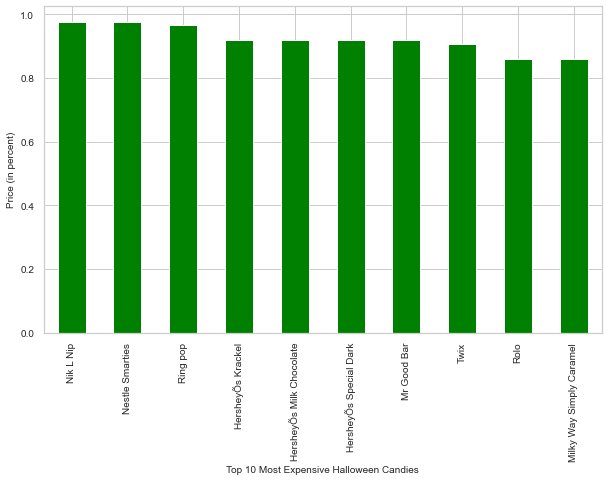

In [18]:
#Top 10 most expensive candies

df_candies.groupby(['competitorname'])['pricepercent'].mean().sort_values(ascending=False)[:10].plot(kind='bar', 
                        figsize=(10,6), fontsize=10, color='green')
plt.ylabel('Price (in percent)', fontsize=10)
plt.xlabel('Top 10 Most Expensive Halloween Candies', fontsize=10)

- Above bar chart shows the top 10 most expensive candies. 
- Out of which, **Nik L Nip and Nestle Smarties** are the most expensive halloween candies.

### 4.9 Which are the most wining candy composition?

In [19]:
def corrank(X: pd.DataFrame):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().abs().loc[i,j]] 
                       for i,j in list(itertools.combinations(X.corr().abs(), 2))],columns=['Combo1','Combo2','corr'])    
    return df.sort_values(by='corr',ascending=False).reset_index(drop=True)

# prints a descending list of correlation pair (Max on top)
corrank(df_candies)

,Combo1,Combo2,corr
0,chocolate,fruity,0.741721
1,chocolate,winpercent,0.636517
2,chocolate,bar,0.597421
3,bar,pluribus,0.593409
4,nougat,bar,0.522976
...,...,...,...
61,caramel,peanutyalmondy,0.059356
62,pluribus,sugarpercent,0.045523
63,fruity,sugarpercent,0.034393
64,peanutyalmondy,crispedricewafer,0.017646


In [20]:
df_candies.isnull().sum()/len(df_candies)

competitorname      0.0
chocolate           0.0
fruity              0.0
caramel             0.0
peanutyalmondy      0.0
nougat              0.0
crispedricewafer    0.0
hard                0.0
bar                 0.0
pluribus            0.0
sugarpercent        0.0
pricepercent        0.0
winpercent          0.0
dtype: float64

In [21]:
winners = df_candies[df_candies.winpercent>df_candies.winpercent.quantile(.6)]

In [22]:
!pip install mlxtend==0.17.3

You should consider upgrading via the 'C:\Users\vins_\anaconda3\python.exe -m pip install --upgrade pip' command.


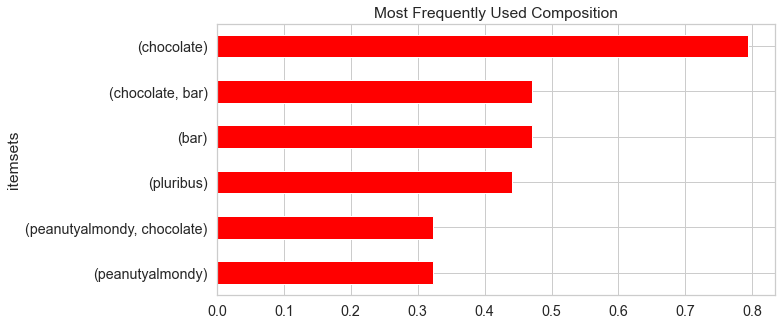

In [23]:
#importing mlxtend Apriori algorithm for frequent item set mining and association rule learning over relational databases.

from mlxtend.frequent_patterns import apriori
df =  winners[df_candies.columns[1:-3]]
association = apriori(df, min_support=0.3,use_colnames=True).sort_values(by='support')


association.plot(kind='barh',x='itemsets',y='support',title=f'Most Frequently Used Composition',
                 sort_columns=True,figsize = (10,5), color='red', legend=False)

- from the above chart, it is clearly visible that Chocloate surely is the wining component in a Candy.
- Second best wining component is the chocolate and bar composition.

### 4.10 Correlation between sugarpercent, pricepercent on the wining percent

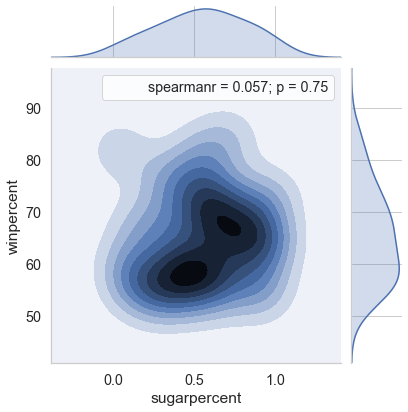

In [24]:
from scipy.stats import spearmanr
sns.jointplot(x="sugarpercent", y="winpercent", data=winners,kind="kde", stat_func=spearmanr)

- the above chart shows sugarpercent is not linear to the wining percent, i.e. sugar content of candy doesn't contribute to the popularity of the candy.

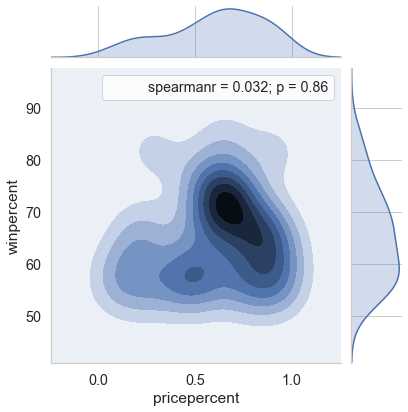

In [25]:
sns.jointplot(x="pricepercent", y="winpercent", data=winners,kind="kde", stat_func=spearmanr)

- the above chart shows pricepercent is not linear to the wining percent, i.e. price of candy doesn't contribute to the popularity of the candy.


### 4.11 EDA Conclusion:

- To conclude that, the EDA on the dataset helped us to visualize the correlations of all features with each other and the target variable. 
- It also helped us to find the most popular candy combinations, it's brands and the various favourable varieties of candies. 
- Let's further explore by analysing through Basic Machine learning algorithms and predictive modeling. 

## 5. Applying Regression Models: Linear, Decision Tree & Random Forest

### 5.1 Split Train/Test Data

In [26]:
#Defining features and target
features1 = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat','crispedricewafer', 'hard', 
             'bar', 'pluribus', 'sugarpercent','pricepercent']
target1 = ['winpercent']

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_candies[features1], df_candies[target1], test_size=0.2, random_state=2)

In [28]:
print('Train cases as below')
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
x_train shape:  (68, 11)
y_train shape:  (68, 1)

Test cases as below
x_test shape:  (17, 11)
y_test shape:  (17, 1)


### 5.2 Applying Min/Max Scaler

In [29]:
## lets scale some variables for use in our predictive model

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_var = ['winpercent']
df_candies[scale_var] = scaler.fit_transform(df_candies[scale_var])

In [30]:
df_candies.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,0.721251
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,0.731475
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,0.158998
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,0.383432
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,0.484266


### 5.3 Applying Linear Regression

In [31]:
##create LR model 
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 5.3.1 Using the Model for Predictions

In [32]:
# Making predictions on the train set.
y_pred_train=lr_model.predict(x_train)
y_pred_train[:10]

array([[36.66225498],
       [58.34151693],
       [72.93473634],
       [60.35729324],
       [33.38470727],
       [70.83485638],
       [50.70624268],
       [69.03329412],
       [41.61589841],
       [48.63906555]])

In [33]:
# Making predictions on the test set.

y_pred_test = lr_model.predict(x_test)
y_pred_test[:10]

array([[47.16733256],
       [63.67840413],
       [45.65964322],
       [59.56786526],
       [59.48234511],
       [59.36901069],
       [42.99970098],
       [46.39872862],
       [46.39872862],
       [53.77207364]])

#### 5.3.2 Model Evaluation Technique using MAE, MSE, RMSE and R2

In [34]:
# Calculating the Mean Absolute Error on training and test set.
from sklearn import metrics
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [35]:
print('MAE for Linear Reg model training set is {}'.format(MAE_train))
print('MAE for Linear Reg model test set is {}'.format(MAE_test))

MAE for Linear Reg model training set is 8.227010061191992
MAE for Linear Reg model test set is 8.218064921870807


In [36]:
# Calculating the Mean Squared Error on training and test set.

MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE of the model train set is {}'.format(MSE_train))
print('MSE of the model test set is {}'.format(MSE_test))

MSE of the model train set is 100.73688449682005
MSE of the model test set is 111.14646938734937


In [37]:
# Calculating the Root Mean Squared Error on training and test set.

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt( metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE of the Linear Reg model train set is {}'.format(RMSE_train))
print('RMSE of the Linear Reg model test set is {}'.format(RMSE_test))

RMSE of the Linear Reg model train set is 10.036776598929562
RMSE of the Linear Reg model test set is 10.542602590790823


In [38]:
# Calculating R squared value using the metrics.r2_score() method.

R_squared_train = metrics.r2_score(y_train, y_pred_train)
R_squared_test = metrics.r2_score(y_test, y_pred_test)
print('R squared value of the Linear Reg model train is {}'.format(R_squared_train))
print('R squared value of the Linear Reg model train is {}'.format(R_squared_test))

R squared value of the Linear Reg model train is 0.5604956330491642
R squared value of the Linear Reg model train is 0.2504701495112902


#### Observations for Linear Reg model:

Model evaluations on Linear Regression model shows the following:
1. MAE train score: 8.22
2. MSE train score: 100.7
3. RMSE train score: 10.03
4. R squared train score: 0.56

Linear Reg Model performed fairly in the training set, however failed in the test set with R2 test score at 0.25 which means the model is overfitting.

### 5.4 Applying Decision Tree Model

In [39]:
# Creating Decision Tree model and fitting the data into it.

from sklearn.tree import DecisionTreeRegressor  
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### 5.4.1 Using the Model for Predictions

In [40]:
# Making predictions on the train set.
y_pred_train_dt=dt.predict(x_train)
y_pred_train_dt[:10]

array([37.722336 , 53.2889865, 59.529251 , 55.064072 , 29.703691 ,
       72.887901 , 59.0944175, 76.673782 , 33.43755  , 37.348522 ])

In [41]:
# Making predictions on the test set.

y_pred_test_dt = dt.predict(x_test)
y_pred_test_dt[:10]

array([54.861111, 81.642914, 44.375519, 43.068897, 55.375454, 55.375454,
       34.578991, 52.911392, 52.911392, 56.490501])

#### 5.4.2 Model Evaluation Technique using MAE, MSE, RMSE and R2

In [42]:
# Calculating the Mean Absolute Error on training and test set.
from sklearn import metrics
MAE_train_dt = metrics.mean_absolute_error(y_train, y_pred_train_dt)
MAE_test_dt = metrics.mean_absolute_error(y_test, y_pred_test_dt)
print('MAE of the Decision Tree model train set is {}'.format(MAE_train_dt))
print('MAE of the Decision Tree model test set is {}'.format(MAE_test_dt))

MAE of the Decision Tree model train set is 0.7258044852941177
MAE of the Decision Tree model test set is 12.012130882352942


In [43]:
# Calculating the Mean Squared Error on training and test set.

MSE_train_dt = metrics.mean_squared_error(y_train, y_pred_train_dt)
MSE_test_dt = metrics.mean_squared_error(y_test, y_pred_test_dt)
print('MSE of the Decision Tree model train set is {}'.format(MSE_train_dt))
print('MSE of the Decision Tree model test set is {}'.format(MSE_test_dt))

MSE of the Decision Tree model train set is 7.098291284977404
MSE of the Decision Tree model test set is 205.27400092664388


In [44]:
# Calculating the Root Mean Squared Error on training and test set.

RMSE_train_dt = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_dt))
RMSE_test_dt = np.sqrt( metrics.mean_squared_error(y_test, y_pred_test_dt))
print('RMSE of the Decision Tree model train set is {}'.format(RMSE_train_dt))
print('RMSE of the Decision Tree model test set is is {}'.format(RMSE_test_dt))

RMSE of the Decision Tree model train set is 2.66426186494072
RMSE of the Decision Tree model test set is is 14.327386395523918


In [45]:
# Calculating R squared value using the metrics.r2_score() method.

R_squared_train_dt = metrics.r2_score(y_train, y_pred_train_dt)
R_squared_test_dt = metrics.r2_score(y_test, y_pred_test_dt)
print('R squared value of the Decision Tree model train is {}'.format(R_squared_train_dt))
print('R squared value of the Decision Tree model test is {}'.format(R_squared_test_dt))

R squared value of the Decision Tree model train is 0.9690309062741055
R squared value of the Decision Tree model test is -0.38429040591080454


#### Observations on Decision Tree Reg model:

Model evaluations on Decision Tree model shows the following:
1. MAE train score: 0.72
2. MSE train score: 7.09
3. RMSE train score: 2.66
4. R squared train score: 0.96

Though the model performed well in the training set with low RMSE train score and the R squared train score at 96%; it performed badly in the testing sample with RMSE test score at 13.8 and negative R2 score. This means that our model has overfitted.

### 5.5 Applying Random Forest Regression

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### 5.5.1 Using the Model for Predictions

In [47]:
y_pred_train_rf=rf.predict(x_train)
y_pred_train_rf[:10]

array([37.72070255, 53.46207151, 66.67438296, 56.41182612, 32.58509645,
       73.10475411, 57.66358687, 73.77828245, 38.74536906, 43.19278441])

In [48]:
# Making predictions on the test set.

y_pred_test_rf = rf.predict(x_test)
y_pred_test_rf[:10]

array([51.16164844, 67.11892587, 51.2104477 , 52.96235709, 55.61330759,
       55.65072032, 36.19972312, 39.08880279, 39.08880279, 56.8089339 ])

#### 5.5.2 Model Evaluation Technique using MAE, MSE, RMSE and R2

In [49]:
# Calculating the Mean Absolute Errort.

MAE_train_rf = metrics.mean_absolute_error(y_train, y_pred_train_rf)
MAE_test_rf = metrics.mean_absolute_error(y_test, y_pred_test_rf)
print('MAE of the Random Forest model train set is {}'.format(MAE_train_rf))
print('MAE of the Random Forest model test is is {}'.format(MAE_test_rf))

MAE of the Random Forest model train set is 3.8117792553690513
MAE of the Random Forest model test is is 8.860107562950986


In [50]:
# Calculating the Mean Squared Error 

MSE_train_rf = metrics.mean_squared_error(y_train, y_pred_train_rf)
MSE_test_rf = metrics.mean_squared_error(y_test, y_pred_test_rf)
print('MSE of the Random Forest model train set is {}'.format(MSE_train_rf))
print('MSE of the Random Forest model test set is {}'.format(MSE_test_rf))

MSE of the Random Forest model train set is 24.878646148054038
MSE of the Random Forest model test set is 127.79290451470422


In [51]:
# Calculating the Root Mean Squared Error 

RMSE_train_rf = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train_rf))
RMSE_test_rf = np.sqrt( metrics.mean_squared_error(y_test, y_pred_test_rf))
print('RMSE of the Random Forest model train set is {}'.format(RMSE_train_rf))
print('RMSE of the Random Forest model test set is {}'.format(RMSE_test_rf))

RMSE of the Random Forest model train set is 4.987849852196239
RMSE of the Random Forest model test set is 11.30455238011237


In [52]:
# Calculating R- squared value on training 

R_squared_train_rf = metrics.r2_score(y_train, y_pred_train_rf)
R_squared_test_rf = metrics.r2_score(y_test, y_pred_test_rf)
print('R squared value of the Random Forest model train set is {}'.format(R_squared_train_rf))
print('R squared value of the Random Forest model test set is {}'.format(R_squared_test_rf))

R squared value of the Random Forest model train set is 0.8914570995468943
R squared value of the Random Forest model test set is 0.13821287223608048


#### Observations on Decision Tree Reg model:

Model evaluations on Decision Tree model shows the following:
1. MAE train score: 3.7
2. MSE train score: 23.59
3. RMSE train score: 4.85
4. R squared train score: 0.89

Though the Random forest model has performed well in the train set, it failed miserably showing overfitting during test evaluation.

Let's see if the hyper-parameter tuning of the model might help. 

#### 5.5.3 Hyper-Parameter tuning of the model

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [10,50,100,200,300,500]
# Number of features to consider at every split
max_features = ['auto', 'log2',2,4,8,12]
# Maximum number of levels in tree
max_depth = [2,4,8,16,25]
max_depth.append(None)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               }

#### GridSearch CV

In [54]:
rf_grid = GridSearchCV(estimator = rf, param_grid=random_grid, cv = 3, n_jobs = -1 )
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [55]:
rf_grid.score(x_train,y_train)

0.8595208226040025

In [56]:
rf_grid.score(x_test,y_test)

0.09944827004362966

In [57]:
rf_grid.best_params_

{'max_depth': 25, 'max_features': 'log2', 'n_estimators': 10}

In [58]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=100, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [59]:
rf_random.best_params_

{'n_estimators': 100, 'max_features': 4, 'max_depth': 8}

In [60]:
rf_random.score(x_train,y_train)

0.8811746418873252

In [61]:
rf_random.score(x_test,y_test)

0.28467131739527896

In [62]:
rf.score(x_train,y_train)

0.8914570995468943

**Observation**:
Hyper-Parameter tuning with Grid search and Random search cross validation did not show much improvements in the model. Though the training set scores were good, it didn't perform well in the test set. 

## 6. Performance of Regression models

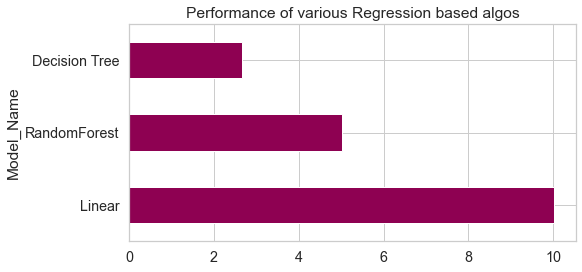

In [63]:
models = ['Linear','Decision Tree','RandomForest']
rmse_err = [10.03, 2.66 , 5.01, ]
pd.DataFrame.from_dict({'Model_Name':models,'RMSE':rmse_err}).sort_values(by='RMSE',ascending=False).plot(x='Model_Name',y='RMSE',
                       kind='barh',sort_columns=True,figsize = (8,4), cmap = 'PiYG', legend=False,title='Performance of various Regression based algos')


- the above graph shows the training scores for each of the models. 
- Our predictive models Linear Reg, Decision Tree Reg and Random Forest Reg overfitted the training data. 

## 7. Feature Selection

Let's see if there are any improvements in model performance after **dropping features Sugarpercent and pricepercent**

### 7.1 Linear Regression with new features

In [64]:
#feature selection, spliting train-test set and fitting Linear Regression
features_12 = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat','crispedricewafer', 'hard', 'bar', 'pluribus']                     # create a Python list of feature names
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_candies[features_12], df_candies[target1], test_size=0.20, random_state=0)
lr_model_2 = LinearRegression()
lr_model_2.fit(X_train_2,y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
#making predictions on train and test set
y_pred_train_2 = lr_model_2.predict(X_train_2)
y_pred_test_2 = lr_model_2.predict(X_test_2)    

In [66]:
RMSE_train_2 = np.sqrt( metrics.mean_squared_error(y_train_2, y_pred_train_2))
RMSE_test_2 = np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_test_2))
print('RMSE for New training set is {}'.format(RMSE_train_2))
print('RMSE for New test set is {}'.format(RMSE_test_2))

RMSE for New training set is 0.1662343640142172
RMSE for New test set is 0.1669180121866968


In [67]:
r2_train_2 = metrics.r2_score(y_test_2, y_pred_test_2)
r2_test_2 = metrics.r2_score(y_test_2, y_pred_test_2)
print('R2 for New training set is {}'.format(r2_train_2))
print('R2 for New test set is {}'.format(r2_test_2))

R2 for New training set is 0.3382915440320796
R2 for New test set is 0.3382915440320796


**Original scores**

In [68]:
print('Original RMSE for training set is {}'.format(RMSE_train))
print('Original RMSE for test set is {}'.format(RMSE_test))
print('Original R2 for training set is {}'.format(R_squared_train))
print('Original R2 for test set is {}'.format(R_squared_test))

Original RMSE for training set is 10.036776598929562
Original RMSE for test set is 10.542602590790823
Original R2 for training set is 0.5604956330491642
Original R2 for test set is 0.2504701495112902


### 7.2 Decision Tree Regression with new features

In [69]:
dt2=DecisionTreeRegressor()
dt2.fit(X_train_2,y_train_2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [70]:
#making predictions on train and test set
y_pred_train_dt2 = dt2.predict(X_train_2)
y_pred_test_dt2 = dt2.predict(X_test_2)  

In [71]:
RMSE_train_dt2 = np.sqrt( metrics.mean_squared_error(y_train_2, y_pred_train_dt2))
RMSE_test_dt2 = np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_test_dt2))
print('RMSE for New training set is {}'.format(RMSE_train_dt2))
print('RMSE for New test set is {}'.format(RMSE_test_dt2))

RMSE for New training set is 0.13080675126740277
RMSE for New test set is 0.1550833438113225


In [72]:
r2_train_dt2 = metrics.r2_score(y_test_2, y_pred_test_dt2)
r2_test_dt2 = metrics.r2_score(y_test_2, y_pred_test_dt2)
print('R2 for New training set is {}'.format(r2_train_dt2))
print('R2 for New test set is {}'.format(r2_test_dt2))

R2 for New training set is 0.42879685601780626
R2 for New test set is 0.42879685601780626


**Original Scores**

In [73]:
print('Original RMSE for training set is {}'.format(RMSE_train_dt))
print('Original RMSE for test set is {}'.format(RMSE_test_dt))
print('Original R2 for training set is {}'.format(R_squared_train_dt))
print('Original R2 for test set is {}'.format(R_squared_test_dt))

Original RMSE for training set is 2.66426186494072
Original RMSE for test set is 14.327386395523918
Original R2 for training set is 0.9690309062741055
Original R2 for test set is -0.38429040591080454


### 7.3 Random Forest with new features

In [74]:
rf2=RandomForestRegressor()
rf2.fit(X_train_2,y_train_2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [75]:
y_pred_train_rf2= rf2.predict(X_train_2)
y_pred_test_rf2 = rf2.predict(X_test_2)
 

In [76]:
RMSE_train_rf2 = np.sqrt( metrics.mean_squared_error(y_train_2, y_pred_train_rf2))
RMSE_test_rf2 = np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_test_rf2))
print('RMSE for New training set is {}'.format(RMSE_train_rf2))
print('RMSE for New test set is {}'.format(RMSE_test_rf2))

RMSE for New training set is 0.13260596126686094
RMSE for New test set is 0.1626443659046186


In [77]:
r2_train_rf2 = metrics.r2_score(y_test_2, y_pred_test_rf2)
r2_test_rf2 = metrics.r2_score(y_test_2, y_pred_test_rf2)
print('R2 for New training set is {}'.format(r2_train_rf2))
print('R2 for New test set is {}'.format(r2_test_rf2))

R2 for New training set is 0.3717415714687633
R2 for New test set is 0.3717415714687633


**Original Scores**

In [78]:
print('Original RMSE for training set is {}'.format(RMSE_train_rf))
print('Original RMSE for test set is {}'.format(RMSE_test_rf))
print('Original R2 for training set is {}'.format(R_squared_train_rf))
print('Original R2 for test set is {}'.format(R_squared_test_rf))

Original RMSE for training set is 4.987849852196239
Original RMSE for test set is 11.30455238011237
Original R2 for training set is 0.8914570995468943
Original R2 for test set is 0.13821287223608048


## 8. Performance of Regression models with updated features

In [79]:
models = ['Linear','Decision Tree','RandomForest']
rmse_train_old = [10.03, 2.66 , 5.01]
rmse_train_new = [0.16, 0.13 , 0.13]
r2_train_old = [0.56, 0.96, 0.89]
r2_train_new = [0.33, 0.42 , 0.36]

pd.DataFrame.from_dict({'Model_Name':models,'RMSE_Train_Old':rmse_train_old, 
                        'RMSE_Train_New':rmse_train_new, 'R2_Train_Old':r2_train_old,'R2_Train_New':r2_train_new}).sort_values('RMSE_Train_Old',ascending=False)

,Model_Name,RMSE_Train_Old,RMSE_Train_New,R2_Train_Old,R2_Train_New
0,Linear,10.03,0.16,0.56,0.33
2,RandomForest,5.01,0.13,0.89,0.36
1,Decision Tree,2.66,0.13,0.96,0.42


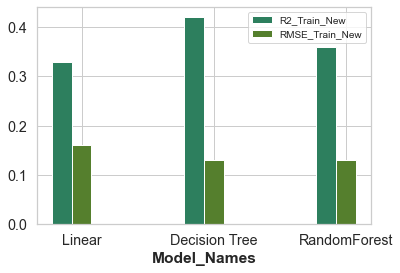

In [80]:
# set width of bar
barWidth = 0.15
 
# set height of bar
bars1 = [0.33, 0.42 , 0.36]
bars2 = [0.16, 0.13 , 0.13]
#bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='#2d7f5e', width=barWidth, edgecolor='white', label='R2_Train_New')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='RMSE_Train_New')

 
# Add xticks on the middle of the group bars
plt.xlabel('Model_Names', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Linear','Decision Tree','RandomForest'])
 
# Create legend & Show graphic
plt.legend(fontsize=10)
plt.show()


- After eleminating 2 features (sugarpercent & pricepercent), all the 3 models has shown good results. 
- New RMSE scores have reduced considerably in comparison with the old RMSE scores for Linear Reg, Decision Tree & Random Forest Algorithms.
- Similarly, R squared scores have show good improvements for all the 3 models.
- The above table and the bar graph shows that Decision Tree & Random Forest models are the best fit models.


## 9. Conclusion & Actionable Insights

- This is to conclude that, sugar and price percentages did not contribute to the wining candy percentage.
- It was also clearly evident that chocolate candies have always been the winner with high wining percent. It is followed by Chocolate and bar combination of candies.
- We saw through EDA that, we could ascertain the most popular brand of candy and least favourites. 
- We also could infer the most favourite varieties of candies amongst the masses. 
- Those the predictive modeling gave us a fairly best fit models, there is a scope for further improvements by reducing errors and increasing the R squared score. 
- It would help to reduce model flexibility through further Feature selection with appropriate Feature engineering methods.


